# MTSamples dataset - NLP Pipeline with TF-IDF Embeddings

This notebook demonstrates a Natural Language Processing (NLP) pipeline using the MTSamples dataset. The goal is to classify the medical specialty of a transcription text using Logistic Regression. We preprocess the text, split the data, perform TF-IDF vectorization, train the classifier, and then evaluate the model.

### Key Steps:
1. Import necessary libraries and download resources.
2. Load the dataset (MTSamples).
3. Preprocess the transcription texts (clean and tokenize).
4. Split the data into training and testing sets.
5. Convert text data to numerical features using TF-IDF.
6. Train a Logistic Regression classifier to predict the medical specialty.
7. Evaluate the classifier using a classification report and a confusion matrix.

In [1]:
# STEP 0: Import Required Libraries

# os: for handling operating system related functionality like file paths
import os

# pandas: for data manipulation and analysis
import pandas as pd

# string & re: for string operations and regular expression matching
import string
import re

# nltk: Natural Language Toolkit for text processing
import nltk

# Scikit-learn modules for feature extraction, model training, and evaluation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Matplotlib: for plotting graphs
import matplotlib.pyplot as plt

# Download stopwords list from NLTK
from nltk.corpus import stopwords
nltk.download('stopwords')

# Create a set of English stopwords to filter out common words that may not add value
stop_words = set(stopwords.words('english'))

print('Libraries imported and NLTK stopwords downloaded successfully!')

Libraries imported and NLTK stopwords downloaded successfully!


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pantazis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# STEP 1: Load MTSamples Data

# Get the current working directory to correctly point to where the data file is stored
project_dir = os.getcwd()
print(project_dir)

# Construct the path to the CSV file. Change this path if your dataset is located elsewhere.
mtsamples_path = os.path.join(project_dir, 'mtsamples.csv')

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(mtsamples_path)

# Print out the shape and column names for an overview of the data
print('Dataframe shape:', df.shape)
print('Dataframe columns:', df.columns.tolist())

# The dataset should contain at least two important columns: 'transcription' (the text to classify) 
# and 'medical_specialty' (the label indicating the medical specialty).

h:\MYPROJECTS_GITHUB3\EHR NLP Pipelines
Dataframe shape: (4999, 6)
Dataframe columns: ['Unnamed: 0', 'description', 'medical_specialty', 'sample_name', 'transcription', 'keywords']


In [3]:
# STEP 2: Preprocess the Transcription Texts

def preprocess(text):
    """
    Preprocess the input text by:
      - Lowercasing all letters
      - Removing punctuation (non-word characters) using a regular expression
      - Tokenizing the text into words
      - Removing stopwords
      - Rejoining the tokens into a single string
    
    Parameters:
      text (str): Raw transcription text
    
    Returns:
      str: Cleaned and processed text
    """
    
    # Check if input is a string; if not, return an empty string
    if not isinstance(text, str):
        return ""
    
    # Convert the text to lowercase
    text = text.lower()
    
    # Remove punctuation by substituting any character that is not a word character or whitespace with a space
    text = re.sub(r'[^\w\s]', ' ', text)
    
    # Split the text into individual words/tokens
    tokens = text.split()
    
    # Filter out tokens that are common stopwords
    tokens = [t for t in tokens if t not in stop_words]
    
    # Rejoin the filtered tokens into a clean text string
    return ' '.join(tokens)

# Create a new column 'clean_text' by applying the preprocessing function on the 'transcription' column
df['clean_text'] = df['transcription'].apply(preprocess)

# Remove rows where either the cleaned text or medical specialty is missing
df = df.dropna(subset=['clean_text', 'medical_specialty'])

print('After preprocessing, dataframe shape:', df.shape)
print('Example of cleaned text:', df['clean_text'].iloc[0])

After preprocessing, dataframe shape: (4999, 7)
Example of cleaned text: subjective 23 year old white female presents complaint allergies used allergies lived seattle thinks worse past tried claritin zyrtec worked short time seemed lose effectiveness used allegra also used last summer began using two weeks ago appear working well used counter sprays prescription nasal sprays asthma doest require daily medication think flaring medications medication currently ortho tri cyclen allegra allergies known medicine allergies objective vitals weight 130 pounds blood pressure 124 78 heent throat mildly erythematous without exudate nasal mucosa erythematous swollen clear drainage seen tms clear neck supple without adenopathy lungs clear assessment allergic rhinitis plan 1 try zyrtec instead allegra another option use loratadine think prescription coverage might cheaper 2 samples nasonex two sprays nostril given three weeks prescription written well


In [4]:
# STEP 3: Split Data into Training and Testing Sets

# X contains the preprocessed text data, and y contains the target labels (medical specialties)
X = df['clean_text']
y = df['medical_specialty']

# Perform a stratified train/test split to maintain class distribution using train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,  # 20% of the data is used for testing
    stratify=y,     # Ensures the same proportion of each class in both training and testing sets
    random_state=42 # Random seed for reproducibility
)

print('Training set size:', len(X_train))
print('Testing set size:', len(X_test))

Training set size: 3999
Testing set size: 1000


In [5]:
# STEP 4: Convert Text Data to Numerical Features with TF-IDF

# Initialize the TF-IDF vectorizer with a limit on max features to avoid high-dimensionality
vectorizer = TfidfVectorizer(max_features=5000)

# Fit the vectorizer on the training data and transform the training text into TF-IDF feature vectors
X_train_vec = vectorizer.fit_transform(X_train)

# Use the fitted vectorizer to transform the test data
X_test_vec = vectorizer.transform(X_test)

print('TF-IDF embedding complete!')
print('Training vector shape:', X_train_vec.shape)
print('Testing vector shape:', X_test_vec.shape)

# Now each document is represented as a numerical vector weighted by its TF-IDF score.

TF-IDF embedding complete!
Training vector shape: (3999, 5000)
Testing vector shape: (1000, 5000)


In [6]:
# STEP 5: Train the Logistic Regression Classifier

# We use Logistic Regression because it is well-suited for text classification problems
# The 'class_weight' parameter is set to 'balanced' to adjust weights inversely proportional 
# to class frequencies, which helps if the classes are imbalanced
clf = LogisticRegression(
    max_iter=1000, 
    class_weight='balanced'
)

# Fit the classifier on the training data
clf.fit(X_train_vec, y_train)

print('Model training complete!')
print('Classes being classified:', clf.classes_)

# The classifier is now ready to predict the medical specialty given a new transcription.

Model training complete!
Classes being classified: [' Allergy / Immunology' ' Autopsy' ' Bariatrics'
 ' Cardiovascular / Pulmonary' ' Chiropractic'
 ' Consult - History and Phy.' ' Cosmetic / Plastic Surgery' ' Dentistry'
 ' Dermatology' ' Diets and Nutritions' ' Discharge Summary'
 ' ENT - Otolaryngology' ' Emergency Room Reports' ' Endocrinology'
 ' Gastroenterology' ' General Medicine' ' Hematology - Oncology'
 ' Hospice - Palliative Care' ' IME-QME-Work Comp etc.'
 ' Lab Medicine - Pathology' ' Letters' ' Nephrology' ' Neurology'
 ' Neurosurgery' ' Obstetrics / Gynecology' ' Office Notes'
 ' Ophthalmology' ' Orthopedic' ' Pain Management'
 ' Pediatrics - Neonatal' ' Physical Medicine - Rehab' ' Podiatry'
 ' Psychiatry / Psychology' ' Radiology' ' Rheumatology'
 ' SOAP / Chart / Progress Notes' ' Sleep Medicine' ' Speech - Language'
 ' Surgery' ' Urology']


Classification Report:
                                 precision    recall  f1-score   support

          Allergy / Immunology       0.25      1.00      0.40         1
                       Autopsy       1.00      1.00      1.00         1
                    Bariatrics       0.40      0.50      0.44         4
    Cardiovascular / Pulmonary       0.35      0.45      0.40        74
                  Chiropractic       0.00      0.00      0.00         3
    Consult - History and Phy.       0.20      0.09      0.12       103
    Cosmetic / Plastic Surgery       0.24      0.80      0.36         5
                     Dentistry       0.31      0.80      0.44         5
                   Dermatology       0.36      0.67      0.47         6
          Diets and Nutritions       0.17      0.50      0.25         2
             Discharge Summary       0.44      0.64      0.52        22
          ENT - Otolaryngology       0.43      0.60      0.50        20
        Emergency Room Reports       0.

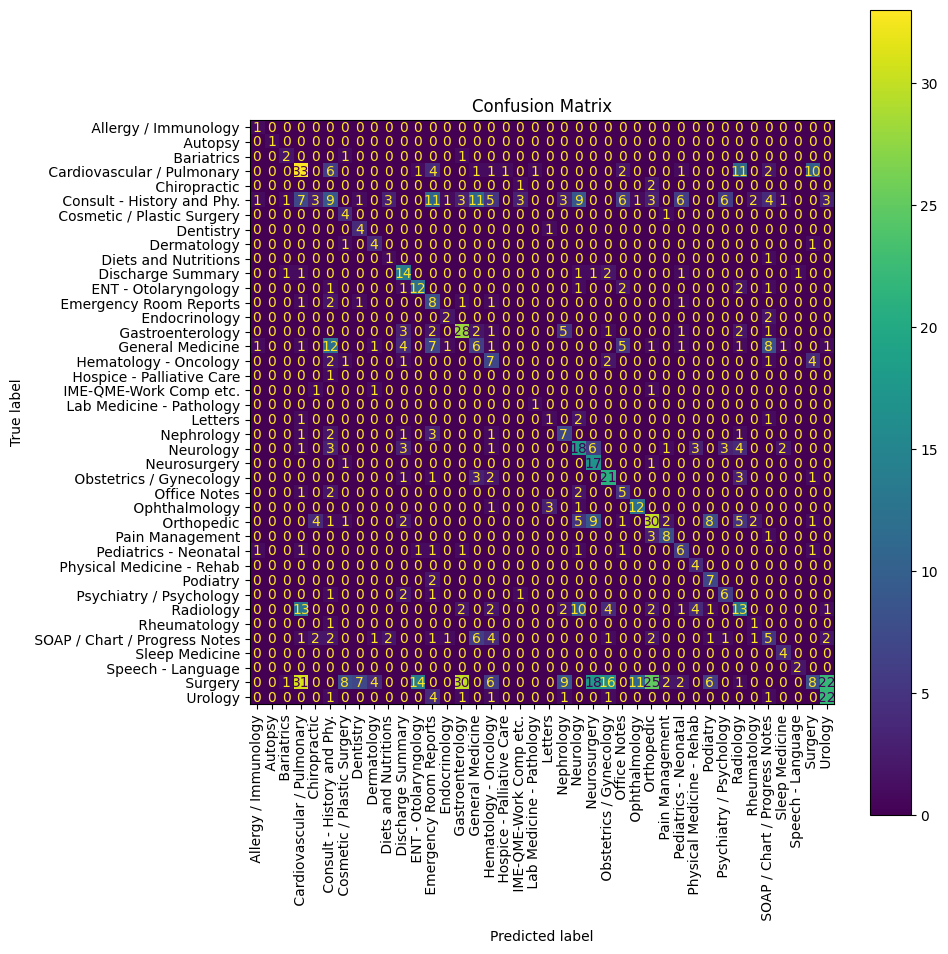

In [7]:
# STEP 6: Evaluate the Classifier

# Predict the medical specialty for the test set
y_pred = clf.predict(X_test_vec)

# Generate a classification report including precision, recall, and F1-score for each class
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

# Generate a confusion matrix to show the model's performance across different classes
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

# Plot the confusion matrix with appropriate formatting
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax, xticks_rotation=90)
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# The confusion matrix and the classification report provide insight into which medical specialties 
# are being classified well and where the classifier might be confusing one specialty for another.